In [1]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 578.2MB 22kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61a66000 @  0x7ff44ed582a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 112kB 4.3MB/s 
    100% |████████████████████████████████| 61kB 7.7MB/s 
    100% |████████████████████████████████| 9.0MB 3.8MB/s 
    100% |████████████████████████████████| 112kB 22.4MB/s 
    100% |████████████████████████████████| 112kB 27.8MB/s 
    100% |████████████████████████████████| 1.0MB 19.7MB/s 
    100% |████████████████████████████████| 2.2MB 1.5MB/s 
  Running setup.py bdist_wheel for prometheus-client ... - \ done
  Stored in directory: /root/.c

In [2]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 4.2MB/s 
    100% |████████████████████████████████| 235kB 7.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
# import pandas as pd
# import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
import cv2
import shutil
import PIL

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"datajhonny","key":"868f24119d6b14f1dcdc4b17761336c1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c quickdraw-doodle-recognition -f test_simplified.csv -p data

 98% 58.0M/59.0M [00:00<00:00, 113MB/s] 
100% 59.0M/59.0M [00:00<00:00, 182MB/s]


In [8]:
!kaggle competitions download -c quickdraw-doodle-recognition -f train_simplified.zip -p data

100% 7.36G/7.37G [00:56<00:00, 145MB/s]
100% 7.37G/7.37G [00:56<00:00, 139MB/s]


In [9]:
!ls

data  kaggle.json  sample_data


In [0]:
!cd ../

In [0]:
import os
os.chdir('data')

In [11]:
!unzip train_simplified.zip -d train

Archive:  train_simplified.zip
  inflating: train/fence.csv         
  inflating: train/yoga.csv          
  inflating: train/horse.csv         
  inflating: train/sandwich.csv      
  inflating: train/cat.csv           
  inflating: train/camouflage.csv    
  inflating: train/mosquito.csv      
  inflating: train/see saw.csv       
  inflating: train/onion.csv         
  inflating: train/grapes.csv        
  inflating: train/chandelier.csv    
  inflating: train/stitches.csv      
  inflating: train/sink.csv          
  inflating: train/trumpet.csv       
  inflating: train/cell phone.csv    
  inflating: train/skyscraper.csv    
  inflating: train/hourglass.csv     
  inflating: train/donut.csv         
  inflating: train/ceiling fan.csv   
  inflating: train/bowtie.csv        
  inflating: train/lipstick.csv      
  inflating: train/suitcase.csv      
  inflating: train/moon.csv          
  inflating: train/dishwasher.csv    
  inflating: train/mermaid.csv       
  inflating: train/

In [17]:
%cd /content/data/train/

/content/data/train


In [0]:
df = pd.read_csv('hat.csv')

In [19]:
df.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,AU,"[[[134, 117, 95, 62, 42, 25, 14, 3, 0], [14, 5...",5157744208248832,True,2017-03-28 07:06:35.700000,hat
1,US,"[[[3, 98, 150, 223, 245, 255, 248, 223, 51, 0]...",5026092974866432,True,2017-03-09 19:22:16.288010,hat
2,DE,"[[[0, 40, 110, 255], [70, 78, 82, 82]], [[101,...",6135868706258944,True,2017-01-27 19:36:27.153440,hat
3,US,"[[[99, 110, 135, 160, 184, 205, 220, 231, 239]...",4954397018685440,True,2017-03-08 05:40:48.811520,hat
4,AU,"[[[74, 71, 74, 81, 88, 95, 105, 116, 122, 143,...",5611676197978112,True,2017-03-11 06:47:33.367800,hat


In [0]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [21]:
%%time
def get_counts(path): return (path.stem, pd.read_csv(path).shape[0])
with ThreadPoolExecutor(12) as e: counts = list(e.map(get_counts, Path('/content/data/train/').iterdir()))

CPU times: user 7min 23s, sys: 36.6 s, total: 7min 59s
Wall time: 5min 42s


In [0]:
BASE_SIZE = 256
def draw_cv2(raw_strokes, size=256, lw=4, time_color=False):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for t, stroke in enumerate(raw_strokes):
        for i in range(len(stroke[0]) - 1):
            color = 255 - min(t, 10) * 13 if time_color else 255
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]),
                         (stroke[0][i + 1], stroke[1][i + 1]), color, lw)
    img = cv2.copyMakeBorder(img,4,4,4,4,cv2.BORDER_CONSTANT)
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size), interpolation=cv2.INTER_LINEAR)
    else:
        return img

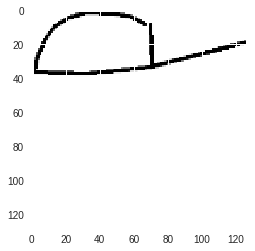

In [23]:
plt.imshow(draw_cv2(eval(df.loc[0, 'drawing']), size=128))

In [0]:
sz = 128 # size
r = 0.01 # portion of images to keep, we want only 1% of total train data
shutil.rmtree(f'data/train-{sz}', ignore_errors=True) # deleting whatever we have saved earlier
os.makedirs(f'data/train-{sz}') # best to have where to save the images

In [0]:
def save_ims_from_df(path):
    df = pd.read_csv(path)
    selected = df[df.recognized==True].sample(int(r * df.shape[0]))
    for row in selected.iterrows():
        idx, drawing, label = row[0], eval(row[1].drawing), '_'.join(row[1].word.split())
        ary = draw_cv2(drawing, size=128)
        rgb_ary = np.repeat(ary[:,:,None], 3, -1)
        PIL.Image.fromarray(rgb_ary).save(f'data/train-{sz}/{label}_{idx}.png')

In [26]:
%%time
with ThreadPoolExecutor(12) as e: e.map(save_ims_from_df, Path('/content/data/train/').iterdir())

CPU times: user 36min 8s, sys: 6min 20s, total: 42min 29s
Wall time: 28min 27s


In [27]:
!ls data/train-{sz} -lhS | head -n 10

total 2.0G
-rw-r--r-- 1 root root 8.0K Nov  1 07:26 camouflage_113406.png
-rw-r--r-- 1 root root 7.9K Nov  1 07:28 camouflage_149106.png
-rw-r--r-- 1 root root 7.7K Nov  1 07:33 hurricane_118819.png
-rw-r--r-- 1 root root 7.4K Nov  1 07:28 camouflage_19183.png
-rw-r--r-- 1 root root 7.3K Nov  1 07:22 blackberry_119360.png
-rw-r--r-- 1 root root 7.2K Nov  1 07:29 brain_17517.png
-rw-r--r-- 1 root root 7.1K Nov  1 07:23 blackberry_43402.png
-rw-r--r-- 1 root root 7.1K Nov  1 07:23 blackberry_60078.png
-rw-r--r-- 1 root root 7.1K Nov  1 07:23 blackberry_109732.png


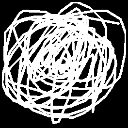

In [29]:
PIL.Image.open(f'data/train-{sz}/blackberry_119360.png')

In [0]:
df = pd.read_csv('/content/data/test_simplified.csv')

In [31]:
df.head()

,key_id,countrycode,drawing
0,9000003627287624,DE,"[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,UA,"[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,BG,"[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,US,"[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,AR,"[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


In [32]:
df.shape

(112199, 3)

In [0]:
shutil.rmtree(f'data/test-{sz}', ignore_errors=True)
os.makedirs(f'data/test-{sz}')

In [0]:
def save_test_ims_from_df(path):
    df = pd.read_csv(path)
    for row in df.iterrows():
        key_id, drawing = row[1].key_id, eval(row[1].drawing)
        ary = draw_cv2(drawing, size=128)
        rgb_ary = np.repeat(ary[:,:,None], 3, -1)
        PIL.Image.fromarray(rgb_ary).save(f'data/test-{sz}/{key_id}.png')

In [35]:
%time save_test_ims_from_df('/content/data/test_simplified.csv')

CPU times: user 4min 22s, sys: 7.89 s, total: 4min 30s
Wall time: 4min 31s


In [36]:
ls -lht data/test-128 | head -n 10

total 457M
-rw-r--r-- 1 root root 1.9K Nov  1 07:46 9999996442242305.png
-rw-r--r-- 1 root root 2.6K Nov  1 07:46 9999969540362833.png
-rw-r--r-- 1 root root 2.4K Nov  1 07:46 9999968529902445.png
-rw-r--r-- 1 root root 2.6K Nov  1 07:46 9999967586702768.png
-rw-r--r-- 1 root root 2.1K Nov  1 07:46 9999946504414373.png
-rw-r--r-- 1 root root 2.5K Nov  1 07:46 9999938440174842.png
-rw-r--r-- 1 root root  266 Nov  1 07:46 9999910529948270.png
-rw-r--r-- 1 root root 2.1K Nov  1 07:46 9999904523466068.png
-rw-r--r-- 1 root root 3.7K Nov  1 07:46 9999896606505463.png


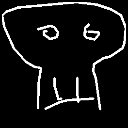

In [37]:
PIL.Image.open(f'data/test-{sz}/9999967586702768.png')

In [0]:
sz = 128

path = Path('data')
path_img = path/f'train-{sz}'

In [39]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('data/train-128/keyboard_136687.png'),
 PosixPath('data/train-128/eyeglasses_190533.png'),
 PosixPath('data/train-128/pineapple_80539.png'),
 PosixPath('data/train-128/peanut_97252.png'),
 PosixPath('data/train-128/harp_240816.png')]

In [0]:
pat = r'/([^/]+)_\d+.png$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=128, test=Path('../test-128'), num_workers = 0)

In [43]:
data.normalize(imagenet_stats)

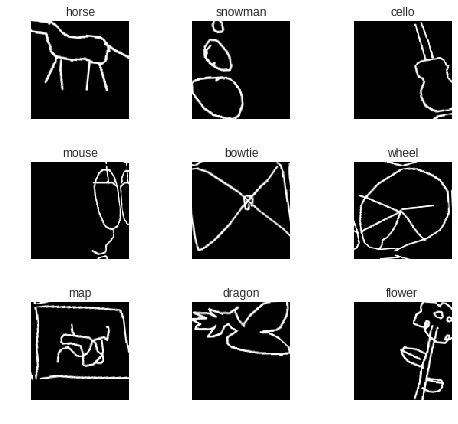

In [44]:
data.show_batch(rows=3, figsize=(7,6))

In [45]:
print(data.classes)
len(data.classes),data.c

['keyboard', 'eyeglasses', 'pineapple', 'peanut', 'harp', 'paint_can', 'mermaid', 'foot', 'crown', 'camel', 'mug', 'mosquito', 'spoon', 'ice_cream', 'moon', 'ocean', 'hot_air_balloon', 'pencil', 'telephone', 'garden_hose', 'pond', 'bottlecap', 'parachute', 'school_bus', 'hospital', 'owl', 'fireplace', 'yoga', 'wheel', 'soccer_ball', 'clock', 'picture_frame', 'smiley_face', 'giraffe', 'toothbrush', 'potato', 'coffee_cup', 'bench', 'calculator', 'baseball', 'dresser', 'cow', 'eraser', 'snowman', 'key', 'saxophone', 'suitcase', 'violin', 'pig', 'mountain', 'pool', 'hurricane', 'toilet', 'sock', 'motorbike', 'sailboat', 'beard', 'fan', 'tractor', 'bird', 'marker', 'rainbow', 'eye', 'cup', 'rake', 'saw', 'birthday_cake', 'lantern', 'light_bulb', 'triangle', 'lollipop', 'frying_pan', 'bicycle', 'broccoli', 'lion', 'ear', 'sun', 'popsicle', 'diamond', 'knee', 'bathtub', 'stethoscope', 'shovel', 'hockey_stick', 'shorts', 'envelope', 'hot_dog', 'tooth', 'mouse', 'cactus', 'camouflage', 'onion',

(340, 340)

In [46]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 67894058.27it/s]


In [47]:
learn.fit_one_cycle(4)

Total time: 3:24:43
epoch  train_loss  valid_loss  error_rate
1      1.895215    1.389054    0.377047    (55:24)
2      1.591254    1.169487    0.324010    (50:20)
3      1.421177    1.033293    0.290581    (49:28)
4      1.372941    0.987382    0.278037    (49:29)



In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

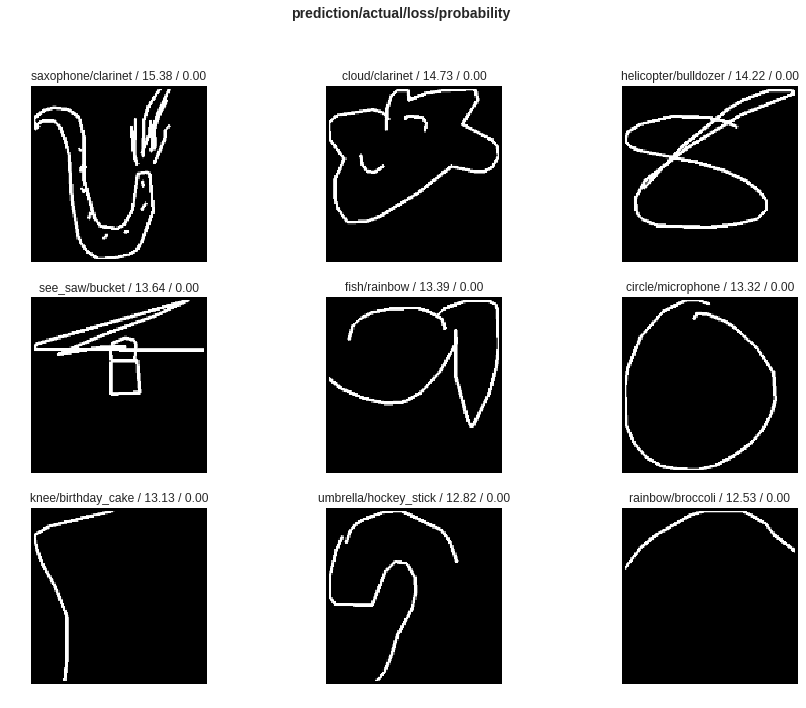

In [51]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.load('stage-1')

In [0]:
learn.unfreeze()

In [55]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


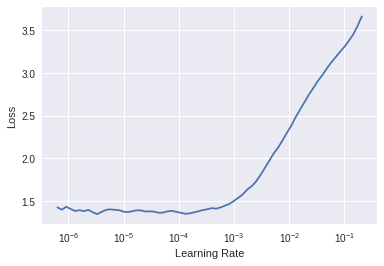

In [56]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(2, max_lr=slice(5e-6,3e-4))

Total time: 1:53:58
epoch  train_loss  valid_loss  error_rate
1      1.233313    0.914118    0.262098    (57:02)
2      1.086864    0.821521    0.236970    (56:56)



In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [61]:
preds = learn.TTA(is_test=True)[0]

Total time: 1:12:18



In [0]:
top_3 = np.argsort(preds.numpy())[:, ::-1][:, :3]

In [0]:
n, _ = top_3.shape
labels = []
for i in range(n):
    labels.append(' '.join([learn.data.train_ds.ds.classes[idx] for idx in top_3[i]]))

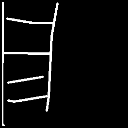

In [64]:
learn.data.test_dl.dl.dataset[0][0]

In [65]:
labels[0]

'ladder dresser spreadsheet'

In [0]:
key_ids = [path.stem for path in learn.data.test_dl.dl.dataset.x]

In [0]:
os.makedirs(f'subs', exist_ok=True)

In [0]:
sub = pd.DataFrame({'key_id': key_ids, 'word': labels})

In [71]:
sub.head()

,key_id,word
0,9760195404283351,ladder dresser spreadsheet
1,9517257625365952,stairs castle dishwasher
2,9501636682182109,bowtie flashlight postcard
3,9722900602342671,square dragon speedboat
4,9739103665854306,flamingo swan giraffe


In [0]:
name = 'first_sub'

In [0]:
sub.to_csv(f'subs/{name}.csv.gz', index=False, compression='gzip')

In [74]:
pd.read_csv(f'subs/{name}.csv.gz').head()

,key_id,word
0,9760195404283351,ladder dresser spreadsheet
1,9517257625365952,stairs castle dishwasher
2,9501636682182109,bowtie flashlight postcard
3,9722900602342671,square dragon speedboat
4,9739103665854306,flamingo swan giraffe


In [75]:
!kaggle competitions submit -c quickdraw-doodle-recognition -f subs/{name}.csv.gz -m "{name}"

100% 1.57M/1.57M [00:01<00:00, 1.26MB/s]
Successfully submitted to Quick, Draw! Doodle Recognition Challenge